<img src="https://bit.ly/2VnXWr2" width="100" align="left">

# Project | ML: Job offers' Fraud-Detection with NLP

## Introduction

In order to experience how to work in a ML project as a group, and to learn more on NLP we have been working on this dataset from Kaggle, [[Real or Fake] Fake Job Posting Prediction](https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction), that holds around 18K job descriptions out of which about 900 are fake. The data consists of both textual information and meta-information about the jobs. 

### Objectives

 We mainly wanted to create a **classification model using text data features and meta-features to predict which job descriptions are fraudulent**. As well as, finding out if there are **key traits/features** (words, entities, phrases) of job descriptions which are **intrinsically fraudulent**.

### Imports

In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Visualization for text
from PIL import Image
from os import path
import os
import random
from wordcloud import WordCloud, STOPWORDS

# Text Processing
import re
import itertools
import spacy
import string
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_sm

# Machine Learning packages


# Ignore noise warning
import warnings
warnings.filterwarnings('ignore')

## 1. Exploratory Data Analysis

### Context

As said above, we've worked on a dataset of job descriptions and their meta information in which a small proportion of these descriptions were fake or scam, which can be identified by the column "fraudulent".

**Columns**:
* `job_id` Unique Job ID
* `title` The title of the job ad entry.
* `location` Geographical location of the job ad.
* `department` Corporate department (e.g. sales).f
* `salary_range` Indicative salary range (e.g. $50,000-$60,000)
* `company_profile` A brief company description.
* `description` The details description of the job ad.
* `requirements` Enlisted requirements for the job opening.
* `benefits` Enlisted offered benefits by the employer.
* `telecommuting` True for telecommuting positions.
* `has_company_logo` True if company logo is present.
* `has_questions` True if screening questions are present.
* `employment_type` Full-type, Part-time, Contract, etc.
* `required_experience` Executive, Entry level, Intern, etc.
* `required_education` Doctorate, Master’s Degree, Bachelor, etc.
* `industry Automotive` IT, Health care, Real estate, etc.
* `function Consulting` Engineering, Research, Sales etc.
* `fraudulent` **target** Classification attribute

### Global EDA

#### Read dataset and check head

In [2]:
data = pd.read_csv("data/fake_job_postings.csv")
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


#### Check shape

In [3]:
data.shape

(17880, 18)

#### Check dtypes and columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
job_id                 17880 non-null int64
title                  17880 non-null object
location               17534 non-null object
department             6333 non-null object
salary_range           2868 non-null object
company_profile        14572 non-null object
description            17879 non-null object
requirements           15185 non-null object
benefits               10670 non-null object
telecommuting          17880 non-null int64
has_company_logo       17880 non-null int64
has_questions          17880 non-null int64
employment_type        14409 non-null object
required_experience    10830 non-null object
required_education     9775 non-null object
industry               12977 non-null object
function               11425 non-null object
fraudulent             17880 non-null int64
dtypes: int64(5), object(13)
memory usage: 2.5+ MB


#### Check nulls

In [5]:
data.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

#### Check duplicates

In [6]:
data.duplicated().sum()

0

#### Check uniques

In [7]:
data.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

#### Target variable distribution

In [8]:
data.fraudulent.value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

### Numerical columns

In [9]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


At first we only got 5 numerical columns being one of them an index ("job_id").

#### See some descriptive statistics of numerical variables

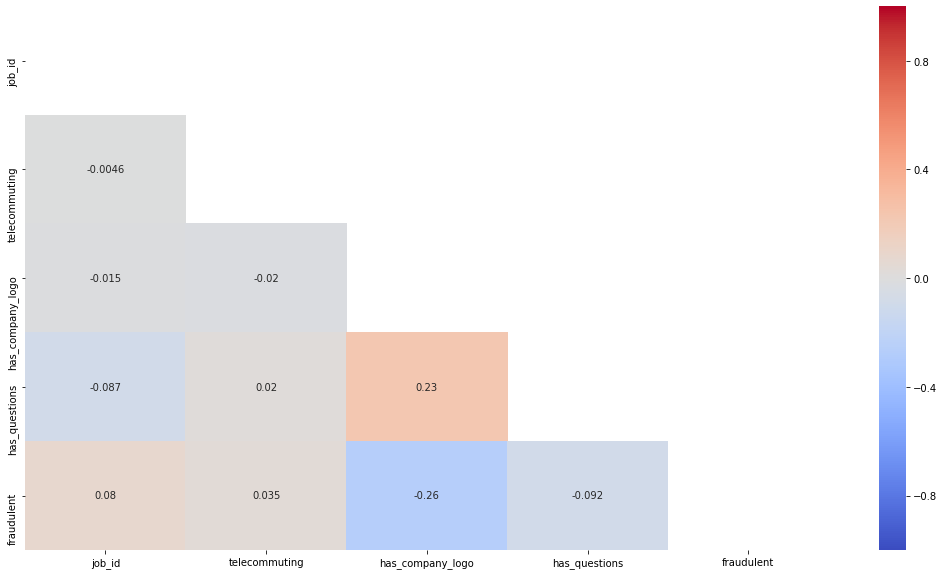

In [10]:
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(), mask=mask, cmap='coolwarm', annot=True, vmin=-1, vmax=1) 

plt.show()

#### Comments

With the raw data we can only find a single correlationship with the target "fraudulent" that is somewhat significative:
*  It seems it is slightly more common for fraudulent job offers to not contain the company logo, though the relationship is of `-0.26`.

### Categorical variables

#### Visualization

In [11]:
data_1 = data.copy()

We will use countplots to visualize most common words in categorical columns, which are not whole sentences/paragraphs, from fraudulent offers against real ones.

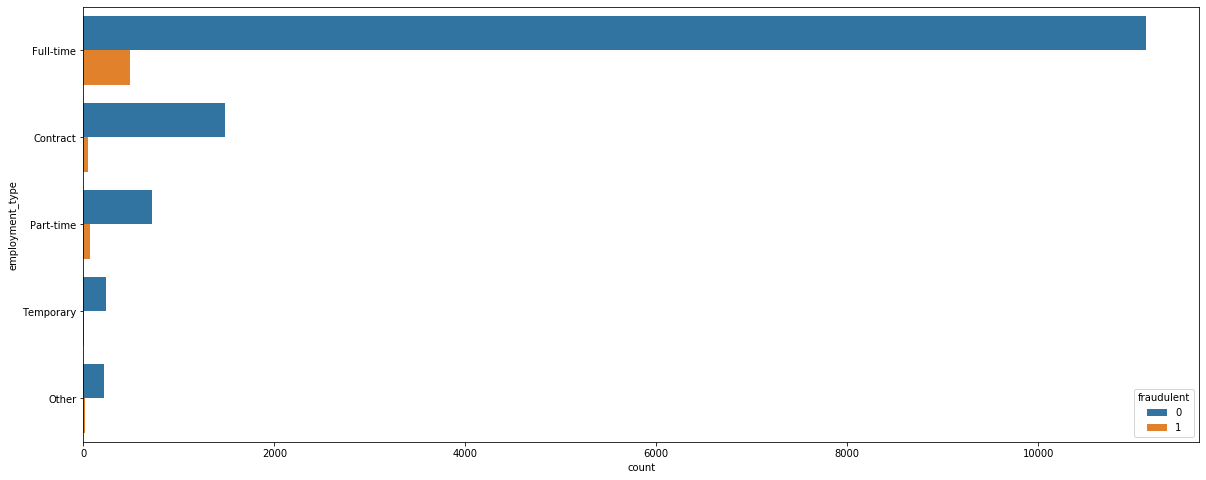

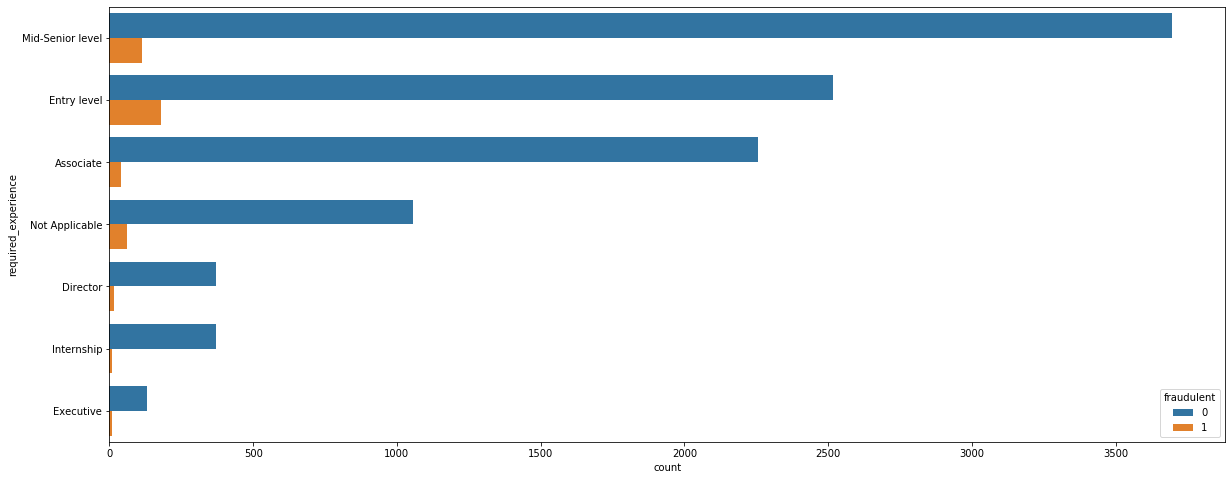

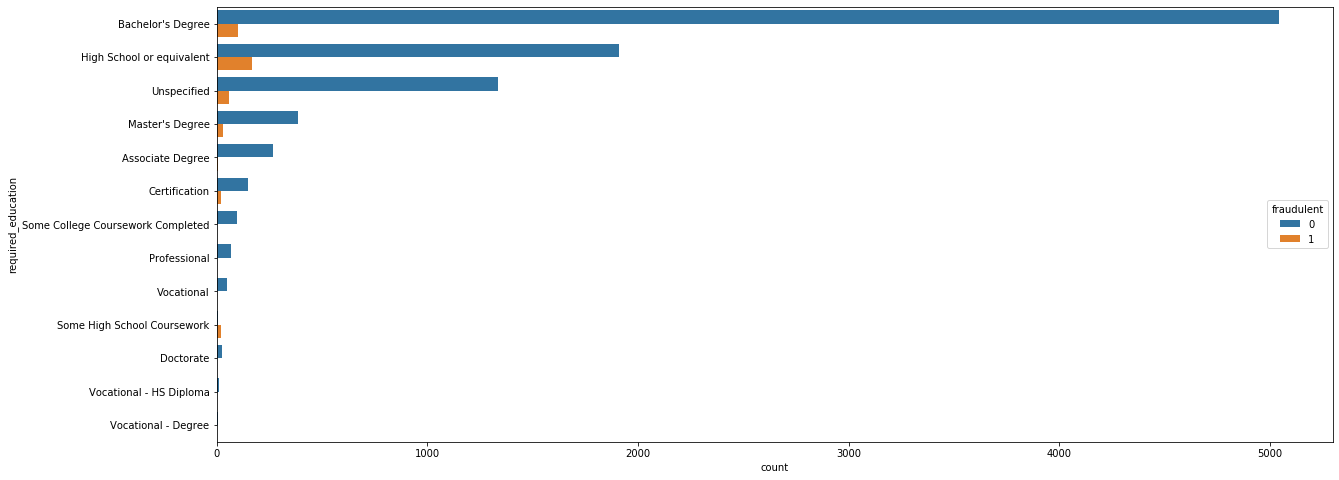

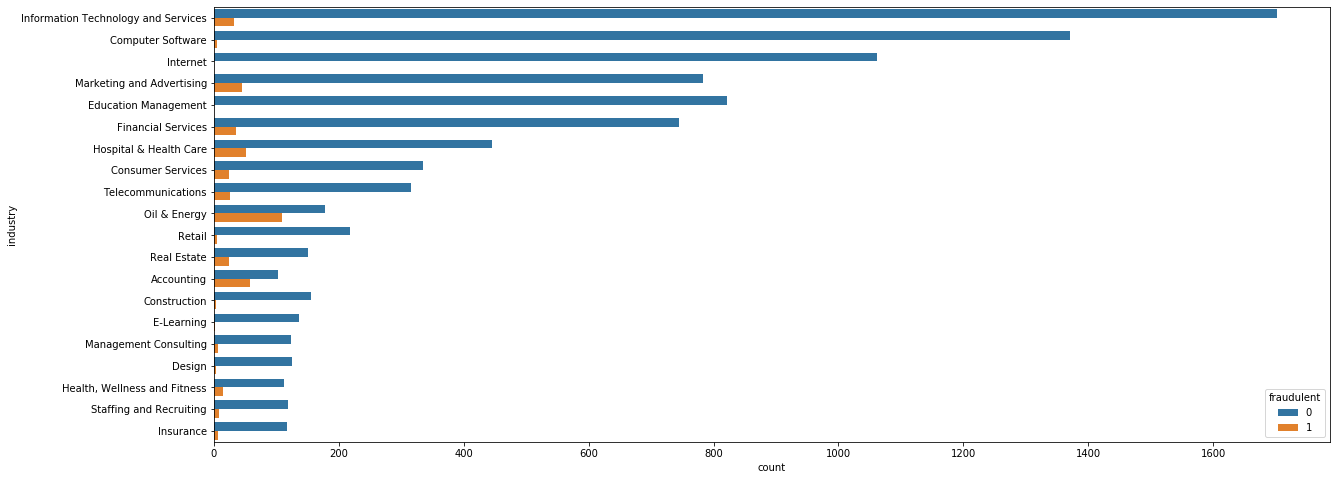

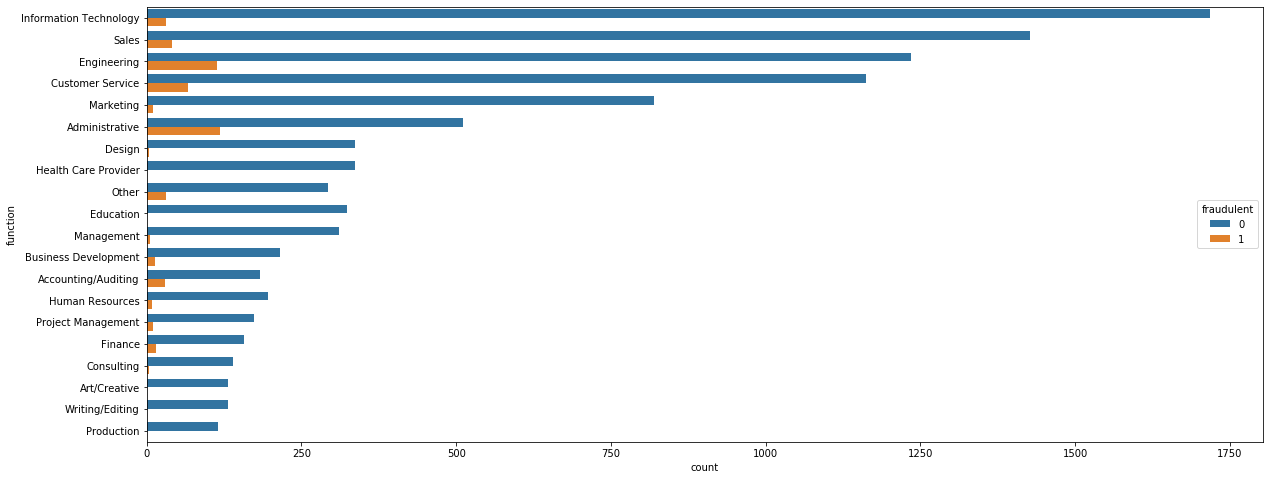

In [12]:
fig, ax = plt.subplots(figsize=(20,8))
ax = sns.countplot(hue="fraudulent",y="employment_type",data=data_1,
                   order=data_1.employment_type.value_counts().iloc[:20].index)

fig, ax = plt.subplots(figsize=(20,8))
ax = sns.countplot(hue="fraudulent",y="required_experience",data=data_1,
                   order=data_1.required_experience.value_counts().iloc[:20].index)
              
fig, ax = plt.subplots(figsize=(20,8))              
ax = sns.countplot(hue="fraudulent",y="required_education",data=data_1,
                   order=data_1.required_education.value_counts().iloc[:20].index)
              
fig, ax = plt.subplots(figsize=(20,8))              
ax = sns.countplot(hue="fraudulent",y="industry",data=data_1,
                   order=data_1.industry.value_counts().iloc[:20].index)

fig, ax = plt.subplots(figsize=(20,8))              
ax = sns.countplot(hue="fraudulent",y="function",data=data_1,
                   order=data_1.function.value_counts().iloc[:20].index)


plt.show()

We will use wordclouds to visualize most common words in categorical columns which are whole sentences/paragraphs from fraudulent offers.

In [13]:
data_1 = data_1.loc[data_1["fraudulent"]==1]

In [14]:
for value in data_1[["title","department","company_profile","description","requirements","benefits"]]:
    data_1[value]= data_1[value].astype(str, errors="ignore")

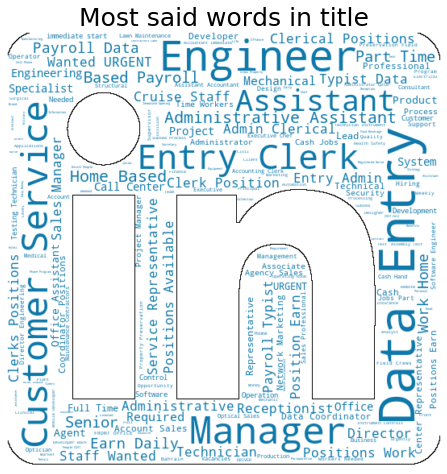

In [15]:
def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "rgb(14, 120, 170)"

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = " ".join(data_1["title"])

mask = np.array(Image.open(path.join(d, "images/LI-In-Bug.png")))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords, max_words=1000,
               repeat=False, min_word_length=4, mask=mask, contour_width=1)

wc.generate(text)

wc.to_file(path.join(d, "images/output_images/linkedin_logo.png"))

plt.figure(figsize=(20,8))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.title("Most said words in title", fontsize=25)
plt.show()

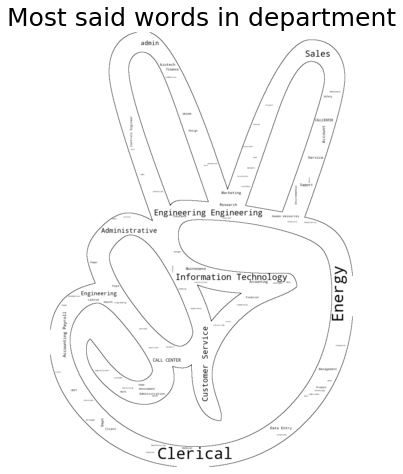

In [16]:
def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "rgb(1, 1, 1)"

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = " ".join(data_1["department"])

mask = np.array(Image.open(path.join(d, "images/AngelList_Black_Victory_Hand.png")))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords, max_words=1000,
               repeat=False, min_word_length=4, mask=mask, contour_width=1)

wc.generate(text)

wc.to_file(path.join(d, "images/output_images/angellist_logo.png"))

plt.figure(figsize=(20,8))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.title("Most said words in department", fontsize=25)
plt.show()

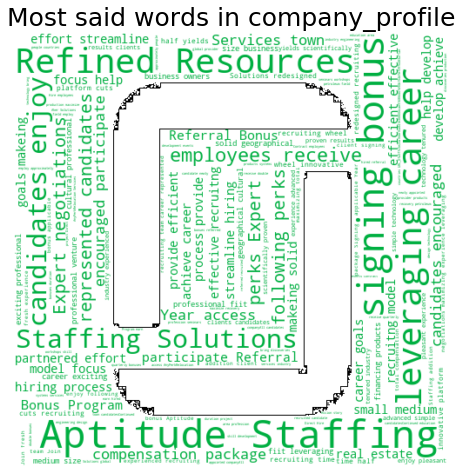

In [17]:
def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "rgb(0, 175, 65)"

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = " ".join(data_1["company_profile"])

mask = np.array(Image.open(path.join(d, "images/glassdoor-socialicon-rgb.jpg")))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords, max_words=1000,
               repeat=False, min_word_length=4, mask=mask, contour_width=1)

wc.generate(text)

wc.to_file(path.join(d, "images/output_images/glassdoor_logo.png"))

plt.figure(figsize=(20,8))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=1), interpolation='bilinear')
plt.axis("off")
plt.title("Most said words in company_profile", fontsize=25)
plt.show()

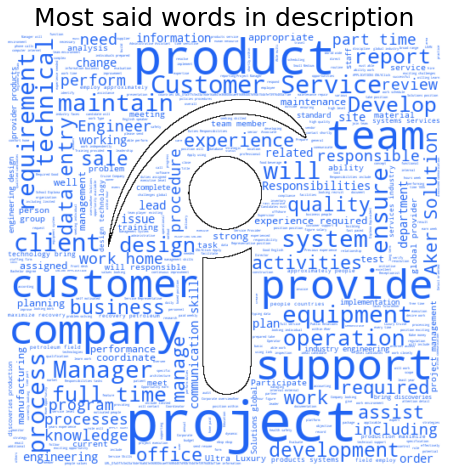

In [18]:
def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "rgb(33, 100, 243)"

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = " ".join(data_1["description"])

mask = np.array(Image.open(path.join(d, "images/Indeed_logo.png")))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords, max_words=1000,
               repeat=False, min_word_length=4, mask=mask, contour_width=1)

wc.generate(text)

wc.to_file(path.join(d, "images/output_images/indeed_logo.png"))

plt.figure(figsize=(20,8))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=1), interpolation='bilinear')
plt.axis("off")
plt.title("Most said words in description", fontsize=25)
plt.show()

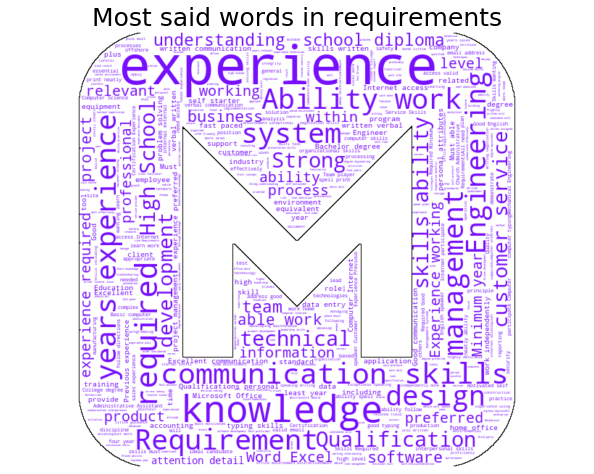

In [19]:
def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "rgb(119, 14, 253)"

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = " ".join(data_1["requirements"])

mask = np.array(Image.open(path.join(d, "images/moster_logo.png")))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords, max_words=1000,
               repeat=False, min_word_length=4, mask=mask, contour_width=1)

wc.generate(text)

wc.to_file(path.join(d, "images/output_images/monster_logo.png"))

plt.figure(figsize=(20,8))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=1), interpolation='bilinear')
plt.axis("off")
plt.title("Most said words in requirements", fontsize=25)
plt.show()

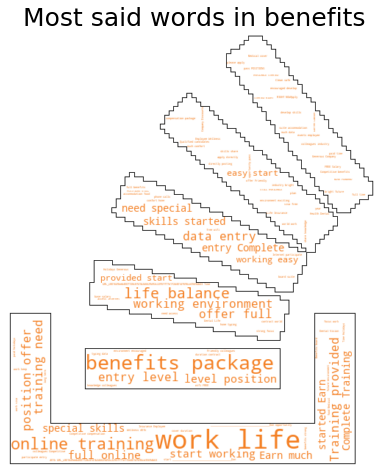

In [20]:
def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "rgb(244, 128, 36)"

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = " ".join(data_1["benefits"])

mask = np.array(Image.open(path.join(d, "images/stackoverflow_logo.PNG")))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords, max_words=1000,
               repeat=False, min_word_length=4, mask=mask, contour_width=1)

wc.generate(text)

wc.to_file(path.join(d, "images/output_images/stackoverflow_logo.png"))

plt.figure(figsize=(20,8))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=1), interpolation='bilinear')
plt.axis("off")
plt.title("Most said words in benefits", fontsize=25)
plt.show()

#### Comments

It seems there is terms that are more frequent than others but we still can't establish any sort of relationship between those terms' frequencies and our target variable, or at least, we can't with those categorical variables where there are far too many unique values.

### Categorical columns: Text and lots of uniques 

In order to better appreciate if it may be a relationship between variables of pure text where there is plenty of different unique values, we will tokenize text columns' content to form a Bag of Words.

#### BoW

In [21]:
data_text = data[['job_id', 'title','department', 'company_profile', 'description', 'requirements', 'benefits']].copy()

In [22]:
data_text = data_text.fillna('')
text_columns = data_text[['job_id']]
text_columns['text'] = data_text.iloc[:,1:].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
def clean_urls(column):
    '''
    This function takes a string and returns a string 
    with its urls removed and all the words in lowercase.
    '''
    return column.apply(lambda x: x.lower()).apply(lambda x: re.sub('http[s]?://\S+', '', x))



text_columns['text'] = clean_urls(text_columns['text'])

C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [24]:
raise SystemExit("Stop right there! Run cells one by one till the end of this notebook.")

SystemExit: Stop right there! Run cells one by one till the end of this notebook.

C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [25]:
nlp = spacy.load('en_core_web_sm', disable = ['ner', 'parser']) 
nlp.max_length = 15000000

In [26]:
def tokenize(string):
    '''
    This function takes a sentence and returns the list of all lemma
    '''
    doc = nlp(string)
    l_token = [token.text for token in doc if not token.is_punct 
               | token.is_space | token.is_stop | token.is_digit & token.is_oov]
    return ' '.join(l_token)


text_columns['text'] = text_columns['text'].apply(lambda row: tokenize(row))

C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [27]:
pd_token = pd.DataFrame(text_columns, columns=['job_id', 'text'])
pd_token.head()

,job_id,text
0,1,marketing intern marketing food52 created grou...
1,2,customer service cloud video production succes...
2,3,commissioning machinery assistant cma valor se...
3,4,account executive washington dc sales passion ...
4,5,bill review manager spotsource solutions llc g...


In [28]:
pd_token.to_pickle("data/output_pickles/token.pkl")

#### Visualization

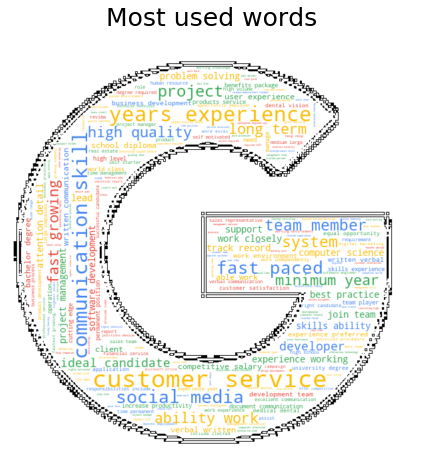

In [29]:
colors = ["rgb(52, 168, 83)", "rgb(251, 188, 5)", "rgb(66, 133, 244)", "rgb(234, 67, 53)"]
def grey_color_func(word, font_size, position, orientation, random_state=1,**kwargs):
    return random.choice(colors)

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = "".join(pd_token["text"])

mask = np.array(Image.open(path.join(d, "images/logo_google.png")))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords, max_words=1000,
               repeat=False, min_word_length=4, mask=mask, contour_width=1)

wc.generate(text)

wc.to_file(path.join(d, "images/output_images/google_logo.png"))

plt.figure(figsize=(20,8))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=1), interpolation='bilinear')
plt.axis("off")
plt.title("Most used words", fontsize=25)
plt.show()

#### Comments

After tokenizing we can se that there's words or short expressions which are more common than others in "text" columns but there's still too much information and it is too raw as to get interesting insights from it.

## 2. Data preprocessing

### Categorical

Categorical refers to columns of categorical variables which are not whole sentences/paragraphs.

In [30]:
categorical_columns = data[["job_id","employment_type", "required_experience", 
                            "required_education", "industry", "function"]].copy()

In [31]:
categorical_columns = categorical_columns.fillna("other")


In [32]:
for column in categorical_columns.columns[1:]:
    categorical_columns[column] = categorical_columns[column].str.lower()

In [33]:
unique_industries_percentage = categorical_columns['industry'].value_counts()/categorical_columns.shape[0]*100

unique_industries_indexes = list(unique_industries_percentage[unique_industries_percentage >= 1].index)

other_industry = categorical_columns["industry"][~categorical_columns["industry"].isin(unique_industries_indexes)].unique()

categorical_columns["industry"].replace(other_industry,"other", inplace=True)

In [34]:
vals_to_replace = {"not applicable":"other", "mid-senior level":"associate", "director":"executive"}
categorical_columns["required_experience"] = categorical_columns["required_experience"].replace(vals_to_replace)


vals_to_replace = {"information technology and services":"information technologies","internet":"information technologies",
                   "computer software":"information technologies", "telecommunications":"information technologies"}

categorical_columns["industry"] = categorical_columns["industry"].replace(vals_to_replace)


vals_to_replace = {"unspecified":"other","some high school coursework":"high school or equivalent",
                   "vocational - hs diploma":"high school or equivalent", "mid-senior level":"associate",
                   "some college coursework completed":"associate degree", "professional":"vocational",
                   "vocational - degree":"vocational","certification":"vocational"}

categorical_columns["required_education"] = categorical_columns["required_education"].replace(vals_to_replace)


vals_to_replace = {"design":"marketing", "public relations":"marketing", "advertising":"marketing", "art/creative":"marketing", 
                   "financial analyst":"finance", "accounting/auditing":"finance","financial analyst":"finance",
                   "training":"human resources","data analyst":"information technology","supply chain":"production",
                   "manufacturing":"production", "quality assurance":"production","project management":"management",
                   "product management":"management", "strategy/planning": "management","sales":"business development",
                   "general business":"business development", "business analyst":"business development",
                   "purchasing":"business development","research":"research and development",
                   "science":"research and development"}

categorical_columns["function"] = categorical_columns["function"].replace(vals_to_replace)


In [35]:
# Split of localitation column

# new data frame with split value columns 
new = data["location"].str.split(",", n = 2, expand = True) 
  
# making separate columns from new data frame 
data["Country"]= new[0] 
data["Region"]= new[1]
data["City"] = new[2]


data['Country'].value_counts() # La distribución del 3r contry es menor a mil, y luego baja en picado.
top_countries = data['Country'].value_counts().head(4).index
other_countries = data['Country'][~data['Country'].isin(top_countries)].unique()

data['Country'].replace(other_countries, 'OTHER', inplace=True)

categorical_columns.loc[:,'Country'] = data.loc[:,'Country']

In [36]:
categorical_columns_dummies = pd.get_dummies(categorical_columns, columns = categorical_columns.columns[1:])

In [37]:
categorical_columns_dummies.head()

,job_id,employment_type_contract,employment_type_full-time,employment_type_other,employment_type_part-time,employment_type_temporary,required_experience_associate,required_experience_entry level,required_experience_executive,required_experience_internship,...,function_marketing,function_other,function_production,function_research and development,function_writing/editing,Country_CA,Country_GB,Country_GR,Country_OTHER,Country_US
0,1,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,4,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Numerical

In [38]:
numerical_columns = data[['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']].copy()

In [39]:
salary_rows_in_benefits = data['benefits'].str.extractall(r'(\$\d+\,?\d+)').reset_index()['level_0'].unique()
salary_rows_in_description = data['description'].str.extractall(r'(\$\d+\,?\d+)').reset_index()['level_0'].unique()

data.loc[salary_rows_in_benefits, 'salary_range'] = 1
data.loc[salary_rows_in_description, 'salary_range'] = 1

nan_salaries = data['salary_range'].isnull()
with_salaries = list(data['salary_range'][~data['salary_range'].isnull()].unique())

data['salary_range'] = data['salary_range'].replace(with_salaries, 1)
data['salary_range'] = data['salary_range'].fillna(0)

numerical_columns['salary_range'] = data['salary_range']

In [40]:
numerical_columns.head()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent,salary_range
0,1,0,1,0,0,0.0
1,2,0,1,0,0,1.0
2,3,0,1,0,0,0.0
3,4,0,1,0,0,0.0
4,5,0,1,1,0,0.0


### Text


Text refers to columns of categorical variables which are whole sentences/paragraphs. As we had to tokenize and lemmatize them using spaCy, and iterate over those columns doing it was so demanding, we decided to do the preprocessing of those columns separately in another notebook and directly import the resulting pickle.

In [45]:
### Import of the clean text data

import pickle

infile = open('data/pickles/clean_text_columns.pkl','rb')
data_text = pickle.load(infile)
infile.close()

In [47]:
data_text.head()

,job_id,title,department,company_profile,description,requirements,benefits
0,1,Marketing Intern,Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,
1,2,Customer Service - Cloud Video Production,Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...
2,3,Commissioning Machinery Assistant (CMA),,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,
3,4,Account Executive - Washington DC,Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...
4,5,Bill Review Manager,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered


In [51]:
data_text = data_text.fillna('')
text_columns = data_text[['job_id']]
text_columns['text'] = data_text.iloc[:,1:].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
text_columns.head()

,job_id,text
0,1,"Marketing Intern Marketing We're Food52, and w..."
1,2,Customer Service - Cloud Video Production Succ...
2,3,Commissioning Machinery Assistant (CMA) Valor...
3,4,Account Executive - Washington DC Sales Our pa...
4,5,Bill Review Manager SpotSource Solutions LLC ...


In [53]:
def clean_urls(column):
    '''
    This functions takes an string and returns an string 
    with the url removed and the words in lower case.
    '''
    return column.apply(lambda x: x.lower()).apply(lambda x: re.sub('http[s]?://\S+', '', x))

text_columns['text'] = clean_urls(text_columns['text'])

C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
text_columns['text']

0        marketing intern marketing we're food52, and w...
1        customer service - cloud video production succ...
2        commissioning machinery assistant (cma)  valor...
3        account executive - washington dc sales our pa...
4        bill review manager  spotsource solutions llc ...
                               ...                        
17875    account director - distribution  sales vend is...
17876    payroll accountant accounting weblinc is the e...
17877    project cost control staff engineer - cost con...
17878    graphic designer   nemsia studios is looking f...
17879    web application developers engineering vend is...
Name: text, Length: 17880, dtype: object

In [ ]:
raise SystemExit("Stop right there! Run cells one by one till the end of this notebook.")

In [55]:
nlp = spacy.load('en_core_web_sm', disable = ['ner', 'parser']) 
nlp.max_length = 15000000

def string_to_lemma(string):
    '''
    This function takes a sentence and returns the list of all lemma
    '''
    doc = nlp(string)
    l_token = [token.lemma_ for token in doc if not token.is_punct 
               | token.is_space | token.is_stop | token.is_digit & token.is_oov] 
    return ' '.join(l_token)


text_columns['text'] = text_columns['text'].apply(lambda row: string_to_lemma(row))

C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
text_columns.head()

,job_id,text
0,1,market intern marketing food52 create groundbr...
1,2,customer service cloud video production succes...
2,3,commission machinery assistant cma valor servi...
3,4,account executive washington dc sale passion i...
4,5,bill review manager spotsource solution llc gl...


In [57]:
## Check if there are any null values

text_columns['text'].isnull().sum()

0

### TF-IDF

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
tfidf = TfidfVectorizer().fit_transform(text_columns['text'])

In [ ]:
raise SystemExit("Stop right there! The following cell takes time to complete.")

In [63]:
import umap

embedding = umap.UMAP(metric='hellinger', random_state=42).fit_transform(tfidf)

In [64]:
# Transformación de los embbeding a positivos
embedding_positive = embedding+20
embedding_positive

array([[24.71429 , 22.090221],
       [22.080013, 20.904112],
       [19.897823, 15.733032],
       ...,
       [18.512445, 16.917871],
       [20.308699, 22.812744],
       [21.293877, 24.07121 ]], dtype=float32)

In [65]:
umap_df = pd.DataFrame(embedding_positive)

In [66]:
text_colums_umap = pd.concat([text_columns['job_id'], umap_df], axis =1)

### Merge

In [71]:
result = pd.concat([categorical_columns_dummies, numerical_columns, text_colums_umap], axis=1,levels=None ,sort=False)

In [72]:
result.drop('job_id',axis =1 ,inplace =True)
result.head()

,employment_type_contract,employment_type_full-time,employment_type_other,employment_type_part-time,employment_type_temporary,required_experience_associate,required_experience_entry level,required_experience_executive,required_experience_internship,required_experience_other,...,Country_GR,Country_OTHER,Country_US,telecommuting,has_company_logo,has_questions,fraudulent,salary_range,0,1
0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0.0,24.714291,22.090221
1,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1.0,22.080013,20.904112
2,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0.0,19.897823,15.733032
3,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0.0,14.740032,29.069805
4,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,1,0,0.0,24.179564,27.688435


## 3.- Model building and evaluation

In [75]:
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.model_selection import train_test_split

### Undersampling of the dataset (due a big differences in number of fraudulent vs non-fraudulent jobs)

In [77]:
Ramdom_sample = InstanceHardnessThreshold(random_state =42)

X_rus, y_rus = Ramdom_sample.fit_resample(result.drop('fraudulent', axis = 1), result['fraudulent'])

In [78]:
# Split dataset

X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, random_state=42, test_size=0.2)

In [88]:
### MODELS ###

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [85]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def baseline_report(model, X_train, X_test, y_train, y_test, name):
    strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True)
    model.fit(X_train, y_train)
    accuracy     = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='accuracy'))
    precision    = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='precision'))
    recall       = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='recall'))
    f1score      = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='f1'))
    rocauc       = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='roc_auc'))
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_pred, y_test).ravel()
    specificity = tn / (tn+fp)

    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'specificity': [specificity]
                            })   
    return df_model

In [89]:
models = {'gnb': GaussianNB(),
          'bnb': BernoulliNB(),
          'mnb': MultinomialNB(),
          'logit': LogisticRegression(),
          'knn': KNeighborsClassifier(),
          'decisiontree': DecisionTreeClassifier(),
          'randomforest': RandomForestClassifier(),
          'svc': SVC(probability=True),
          'linearsvc': LinearSVC(),
          'xgboost': GradientBoostingClassifier(),
          'NN': MLPClassifier()
         }

In [ ]:
raise SystemExit("Stop right there! The following cell takes some time to complete.")

In [90]:
# Evaluation of models
models_df = pd.concat([baseline_report(model, X_train_rus, X_test_rus, y_train_rus, y_test_rus, name) 
                       for (name, model) in models.items()]).sort_values('specificity', ascending=True)
models_df

C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:9

C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum

,model,accuracy,precision,recall,f1score,rocauc,specificity
0,linearsvc,0.951869,0.833782,0.390884,0.591938,0.939635,0.947432
0,mnb,0.942919,0.658749,0.347657,0.461149,0.884332,0.950390
0,logit,0.957737,0.794589,0.517205,0.618382,0.943154,0.962093
0,svc,0.967283,0.975311,0.524388,0.690359,0.962312,0.964565
0,bnb,0.910601,0.405454,0.599116,0.478067,0.896059,0.968695
0,randomforest,0.985879,0.979541,0.830473,0.877427,0.982456,0.984861
0,xgboost,0.977725,0.936036,0.729908,0.815715,0.984079,0.986481
0,NN,0.981901,0.900499,0.785930,0.850699,0.983055,0.986876
0,knn,0.983890,0.936966,0.804594,0.878622,0.964283,0.986914
0,decisiontree,0.984387,0.884380,0.861984,0.874336,0.928885,0.990638


In [ ]:
## TO-DO 
  # Check the performance of the models with the test (althought specificity is excellent)
  # Check the variance between different validations 
    # (we are seeing only the mean, but there is high variance in the predictions between models??)

## 4. Hyperparameter Tunning of the Models

Althought the metrics of the different models are really good, we can still improve the performance of the models. Therefore, a fine tunning of the different parameters of each models has to be done.

In [ ]:
## 4.1 KNN Tunning

In [ ]:
## 4.2 RandomForest

In [ ]:
## 4.3 MLP